Notebook to showcase usage of the `HardwareRoadmap` and `LifespanEstimator` modules.

A `HardwareRoadmap` is essentially a projection of where we expect quantum computing hardware to be at specific timepoints in the future.

The `LifespanEstimator` takes resource estimates for breaking certain cryptographic protocols, and compares them with entries in the `HardwareRoadmap` in an attempt to predict when in the future we expect the protocols to be broken. It is the module which will produce the core output of the quantum threat tracker.

In [1]:
from pathlib import Path

from qsharp.estimator import EstimatorParams

from quantumthreattracker.lifespan_estimator import HardwareRoadmap, LifespanEstimator

In [2]:
roadmap_path = str(Path.cwd().parent) + '/data/hardware_roadmaps'
report_path = str(Path.cwd().parent) + '/data/threat_reports'

A `HardwareRoadmap` is essentially a list of timestamps, paired with quantum computer specifications, expressed using Q#'s `EstimatorParams` class.

In this simple example, our hardware roadmap contains two qubit technologies (superconducting qubits and trapped ions) following Moore's law (the number of qubits in each computer doubles every 2 years).

In [3]:
hardware_roadmap = HardwareRoadmap()

params_sc = EstimatorParams()  # parameters for typical superconducting qubits
params_sc.qubit_params.name = "qubit_gate_ns_e3"

params_ti = EstimatorParams()  # parameters for typical trapped ion qubits
params_ti.qubit_params.name = "qubit_gate_us_e4"

for i in range(1, 20):
    params_sc.constraints.max_physical_qubits = 1000 * (2**i)
    params_ti.constraints.max_physical_qubits = 100 * (2**i)
    hardware_roadmap.add(timestamp=1735689600 + 31536000 * 1.5 * i, estimator_params=[params_sc])

In [4]:
hardware_roadmap.save_roadmap(file_name='sample_hardware_roadmap', file_path=roadmap_path)

In [5]:
lifespan_estimator = LifespanEstimator(hardware_roadmap)

In [6]:
protocols = [
    {"algorithm": "RSA", "keySize": 512},
    {"algorithm": "RSA", "keySize": 1024},
    {"algorithm": "RSA", "keySize": 2048},
    {"algorithm": "RSA", "keySize": 4096},
    {"algorithm": "RSA", "keySize": 8192},
    {"algorithm": "ECDH", "keySize": 256},
    {"algorithm": "ECDH", "keySize": 384},
    {"algorithm": "ECDH", "keySize": 521},
    ]

The `generate_report` function saves the threat report as an object in the `LifespanEstimator` instances. This may take a while to run, since it needs to generate quantum resource estimates.

In [7]:
lifespan_estimator.generate_report(protocols=protocols)

We can save the report with an additional parameter called `detail_level`. See the saved files to understand what results are included in each detail level.

It is important to consider space-time tradeoffs in error-corrected quantum algorithms when reasoning about when a cryptographic protocol will be broken. For example, if RSA-2048 can be factored in the year 2055 in 80 days, but also in the year 2060 in only 8 hours, do we consider it to be broken in 2055 or 2060? The solution we settled on was to output **all** possibilities. Hence, the output of the `LifespanEstimator` lists several 'threats' for each cryptographic protocol.

In [8]:
lifespan_estimator.save_report(
    file_name='sample_threat_report_detail=0',
    file_path=report_path,
    detail_level=0,
    )
lifespan_estimator.save_report(
    file_name='sample_threat_report_detail=1',
    file_path=report_path,
    detail_level=1,
    )
lifespan_estimator.save_report(
    file_name='sample_threat_report_detail=2',
    file_path=report_path,
    detail_level=2,
    )
lifespan_estimator.save_report(
    file_name='sample_threat_report_detail=3',
    file_path=report_path,
    detail_level=3,
    )

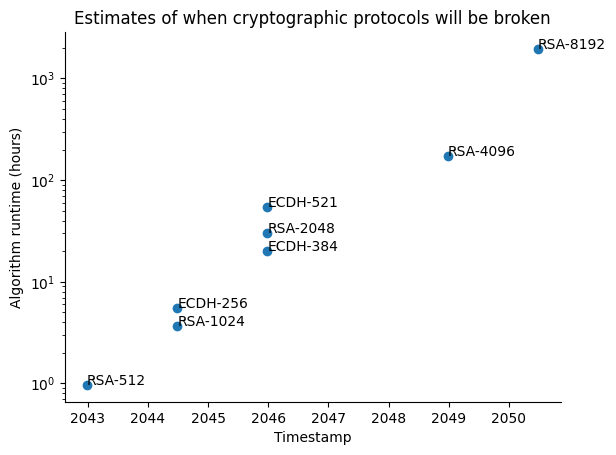

In [9]:
import matplotlib.pyplot as plt

ax = lifespan_estimator.plot_threats()
plt.show()